# KOZMOS - Amazon Yorumları için Duygu Analizi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [3]:
df = pd.read_excel("C:/Users/ASUS/Desktop/amazon.xlsx")

In [4]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [6]:
df.isnull().sum()

Star        0
HelpFul     0
Title      52
Review     18
dtype: int64

In [7]:
# Normalizing Case Folding

In [8]:
df['Review'] = df['Review'].str.lower()

In [9]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [10]:
# Punctuations

In [11]:
df['Review'] = df['Review'].str.replace('[^\w\s]', '')

In [12]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [13]:
# Numbers

In [14]:
df['Review'] = df['Review'].str.replace('\d', '')

In [15]:
df['Review']

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [16]:
# Stopwords

In [17]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [19]:
# Rarewords / Custom Words

In [20]:
df['Review'] = df['Review'].apply(lambda x : " ".join(x for x in str(x).split() if x not in sw))

Bu kod parçası, bir pandas DataFrame içindeki 'Review' sütunundaki metinlerde en az geçen 1000 kelimeyi bulmayı ve bunları bir pandas Series olarak depolamayı amaçlıyor. Şimdi kodu adım adım inceleyelim:

```python
sil = pd.Series(''.join(df['Review']).split()).value_counts()[-1000:]
```

### Adım Adım Açıklama

1. **`df['Review']`:** 
   - DataFrame'in 'Review' sütununu seçer. Bu sütun, her satırda bir metin içerebilir.

2. **`''.join(df['Review'])`:**
   - `'Review'` sütunundaki tüm metinleri birleştirir. `join()` fonksiyonu, tüm satırlardaki metinleri tek bir büyük metin dizisi haline getirir. Burada tırnak işaretleri arasında hiçbir şey olmaması, metinlerin arasına hiçbir karakterin eklenmeyeceği anlamına gelir, yani doğrudan birleştirme yapılır.

3. **`.split()`:**
   - Birleştirilen büyük metni, boşluk karakterlerine göre böler. Sonuç olarak, tüm kelimeler tek tek bir liste halinde elde edilir.

4. **`pd.Series(...).value_counts()`:**
   - `split()` ile elde edilen kelimeler listesini bir pandas Series'e dönüştürür ve `value_counts()` fonksiyonu kullanılarak her bir kelimenin kaç kez tekrarlandığını sayar. Bu adım, kelimeleri ve bu kelimelerin sayısını içeren bir Series döndürür. Kelimeler, en sık tekrarlanandan en az tekrarlanana doğru sıralanır.

5. **`[-1000:]`:**
   - `value_counts()` sonucunda elde edilen Series'in en az geçen 1000 kelimesini seçer. `[-1000:]` dilimi, son 1000 öğeyi seçmek için kullanılır. Bu da, en az geçen 1000 kelimenin alınacağı anlamına gelir.

### Sonuç
`sil` değişkeni, DataFrame'in 'Review' sütunundaki en az geçen 1000 kelimeyi ve bu kelimelerin kaç kez geçtiğini içeren bir pandas Series olacak. Bu kelimeler, veri temizleme ya da analiz sırasında daha az önemli olduğu düşünülen kelimeler olarak silinebilir veya işaretlenebilir.

In [21]:
df['Review'].head()

0                                                happy
1    good quality material however panels mis-matched.
2    product fun bedroom windows.<br />imagery bit ...
3    lo unico que gustaria es que sean un poco mas ...
4    great bang buck can't believe quality material...
Name: Review, dtype: object

In [22]:
# Lemmatization

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

Bu kod, pandas DataFrame içindeki 'Review' sütunundaki metinleri lemmatize ederek işlemek amacı taşır. İşte kodu adım adım açıklayalım:

```python
df['Review'] = df['Review'].apply(lambda x: "".join([Word(word).lemmatize() for word in x.split()]))
```

### Adım Adım Açıklama

1. **`df['Review']`:**
   - DataFrame'in 'Review' sütununu seçer. Bu sütun, yorum metinlerini içerir.

2. **`.apply(lambda x: ... )`:**
   - `apply()` fonksiyonu, 'Review' sütunundaki her bir metin üzerinde bir işlem yapar. Bu işlem, bir `lambda` fonksiyonu kullanılarak belirlenir.

3. **`lambda x: ...`:**
   - `lambda x` ifadesi, her bir metin (`x`) üzerinde işlem yapacak bir anonim fonksiyondur. `x`, 'Review' sütunundaki her bir metni temsil eder.

4. **`x.split()`:**
   - `x.split()` metni boşluk karakterlerine göre böler ve bir kelimeler listesi oluşturur. Örneğin, "this is a test" metni `['this', 'is', 'a', 'test']` şeklinde bir listeye dönüşür.

5. **`[Word(word).lemmatize() for word in x.split()]`:**
   - Bu liste anlama ifadesi, her bir kelimeyi (`word`) lemmatize eder. `Word(word).lemmatize()` ifadesi, `Word` sınıfının bir örneği oluşturur ve bu kelimenin kök formunu (lemmasını) döndürür.
   - Örneğin, "running" kelimesi "run" olarak lemmatize edilir.

6. **`"".join([...])`:**
   - Listede bulunan lemmatize edilmiş kelimeleri tek bir metin haline getirir. `join()` fonksiyonu, her kelimeyi aralarına boşluk eklemeden birleştirir. Sonuç olarak, kelimeler birleştirilmiş ve aralarına boşluk konulmadan tek bir string olarak döner.
   - Burada `"".join()` kullanılması, kelimeleri doğrudan birleştirir ve aralarına boşluk koymaz. Genelde kelimeleri arasına boşluk koymak tercih edilir, bu nedenle `" ".join(...)` kullanımı daha yaygındır.

### Sonuç
Bu kod, 'Review' sütunundaki her bir metni şu işlemlerden geçirir:
1. Metni kelimelere böler.
2. Her kelimeyi lemmatize eder (yani kök formuna indirger).
3. Lemmatize edilmiş kelimeleri tek bir metin halinde birleştirir.

Elde edilen sonuç, her bir metnin kök formdaki kelimeleriyle temsil edildiği bir metin olacaktır. Bu işlem, metinlerin analiz ve modelleme için standartlaştırılmasını sağlar.

In [25]:
df['Review'].head()

0                                                happy
1     good quality material however panel mis-matched.
2    product fun bedroom windows.<br />imagery bit ...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck can't believe quality material...
Name: Review, dtype: object

In [26]:
# Barplot

# Adım 1: Barplot görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği kelimeleri frekanslarını hesaplayınız, tf olarak kaydediniz
        # b. tf dataframe'inin sütunlarını yeniden adlandırınız: "words", "tf" şeklinde
        # c. "tf" değişkeninin değeri 500'den çok olanlara göre filtreleme işlemi yaparak barplot ile görselleştirme işlemini tamamlayınız.

In [27]:
tf = df['Review'].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

Bu kod, bir pandas DataFrame'inin bir sütunundaki metin verilerini kullanarak terim frekanslarını hesaplamak için kullanılır. Kodun ne yaptığını adım adım açıklayalım:

### Kodun Açıklaması

```python
tf = df['Review'].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
```

#### 1. `df['Review'].apply(lambda x : pd.value_counts(x.split(" ")))`

- **`df['Review']`**: DataFrame'deki `'Review'` sütunu, metin verilerini içerir.
- **`.apply(lambda x : ...)`**: Her bir satır (yani her bir yorum) üzerinde işlemi uygular.
- **`x.split(" ")`**: Her bir yorum (`x`), boşluk karakterlerine göre bölünerek kelimelere ayrılır.
- **`pd.value_counts(x.split(" "))`**: Ayrılan kelimelerin frekanslarını hesaplar. Bu, her kelimenin kaç kez tekrarlandığını gösterir.

#### 2. `.sum(axis = 0)`

- **`.sum(axis = 0)`**: Her bir kelimenin tüm yorumlar üzerindeki toplam frekansını hesaplar.
  - `axis=0` parametresi, sütunlar boyunca toplama yapar. Yani, her kelimenin tüm yorumlarda toplam kaç kez geçtiğini hesaplar.

#### 3. `.reset_index()`

- **`.reset_index()`**: Sonuç DataFrame'inin indeksini sıfırlar ve `index` adlı bir sütun ekler. Bu, terim frekanslarının ve kelimelerin daha düzenli bir şekilde sunulmasını sağlar.

### Özet

Bu kod, aşağıdaki işlemleri gerçekleştirir:

1. `'Review'` sütunundaki her yorumdaki kelimeleri ayırır.
2. Her bir kelimenin frekansını hesaplar.
3. Tüm yorumlar için her kelimenin toplam frekansını toplar.
4. Sonuçları düzenli bir DataFrame formatında döndürür. Bu DataFrame, kelimelerin ve bunların toplam frekanslarının bulunduğu iki sütundan oluşur.

### Örnek

Diyelim ki `df['Review']` aşağıdaki gibi bir veri içeriyor:

| Review                |
|-----------------------|
| "good quality good"   |
| "not good"            |
| "excellent quality"   |

Bu kod şu adımları izler:

1. Her yorumu kelimelere ayırır ve frekanslarını hesaplar:
   - "good quality good" → `{'good': 2, 'quality': 1}`
   - "not good" → `{'not': 1, 'good': 1}`
   - "excellent quality" → `{'excellent': 1, 'quality': 1}`

2. Bu frekansları toplar:
   - `{'good': 4, 'quality': 2, 'not': 1, 'excellent': 1}`

3. Sonuçları düzenli bir DataFrame olarak döndürür:
   - Sütunlar: `'index'` (kelimeler) ve `'0'` (toplam frekanslar)

Sonuç DataFrame'inin görünümü şöyle olabilir:

| index      | 0 |
|------------|---|
| good       | 4 |
| quality    | 2 |
| not        | 1 |
| excellent  | 1 |

Bu şekilde, her kelimenin toplam frekansını görebilirsiniz.

In [28]:
print(tf.head())
print(tf.describe())

      index      0
0     happy 171.00
1      good 454.00
2   quality 609.00
3  material 398.00
4   however  36.00
             0
count 10170.00
mean      6.97
std      39.26
min       1.00
25%       1.00
50%       1.00
75%       3.00
max    1773.00


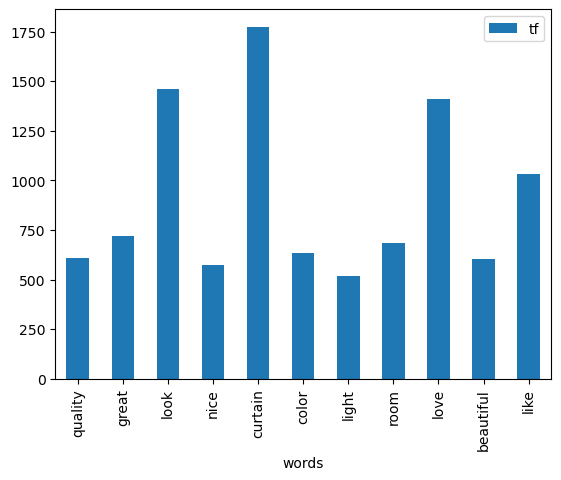

In [29]:
tf.columns = ["words", "tf"]
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

In [30]:
# Wordcloud

# Görev 3: WordCloud görselleştirme işlemi
        # a. "Review" değişkeninin içerdiği tüm kelimeleri "text" isminde string olarak kaydediniz
        # b. WordCloud kullanarak şablon şeklinizi belirleyip kaydediniz
        # c. Kaydettiğiniz wordcloud'u ilk adımda oluşturduğunuz string ile generate ediniz.
        # d. Görselleştirme adımlarını tamamlayınız. (figure, imshow, axis, show)

In [31]:
text = " ".join(i for i in df.Review)

In [32]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)

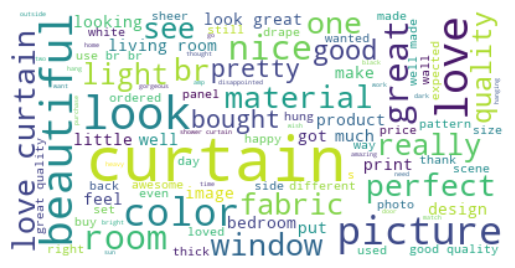

In [33]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Bu kod, `WordCloud` kütüphanesi kullanarak metin verisinden bir kelime bulutu (word cloud) oluşturur. İşte adım adım açıklaması:

### 1. **Metni Birleştirme**

```python
text = " ".join(i for i in df.Review)
```
- **Açıklama:** `df.Review` sütunundaki tüm yorumları birleştirir. `i` burada her bir yorumu temsil eder. `" ".join(...)` ifadesi ile bu yorumlar arasına boşluk koyarak tek bir büyük metin oluşturur.

### 2. **Kelime Bulutu Oluşturma**

```python
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
```
- **Açıklama:** Bu satırda `WordCloud` sınıfından bir nesne oluşturuluyor ve kelime bulutu metni (`text`) ile oluşturuluyor. Parametreler:
  - `max_font_size=50`: Kelimelerin maksimum yazı boyutunu 50 olarak ayarlar.
  - `max_words=100`: Kelime bulutunda görüntülenecek maksimum kelime sayısını 100 olarak belirler.
  - `background_color="white"`: Arka plan rengini beyaz olarak ayarlar.
  - `.generate(text)`: Sağlanan metni kullanarak kelime bulutunu oluşturur.

### 3. **Kelime Bulutunu Görüntüleme**

```python
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
```
- **Açıklama:** `matplotlib.pyplot` kütüphanesinin işlevlerini kullanarak kelime bulutunu görselleştirir:
  - `plt.figure()`: Yeni bir figür oluşturur.
  - `plt.imshow(wordcloud, interpolation="bilinear")`: Kelime bulutunu görselleştirir. `interpolation="bilinear"` parametresi, görüntüdeki pikseller arasında daha düzgün geçişler sağlar.
  - `plt.axis("off")`: Eksenleri kapatır, böylece yalnızca kelime bulutu görünür.
  - `plt.show()`: Görselleştirmeyi ekranda gösterir.

### **Özet**

Bu kod, `df.Review` sütunundaki tüm metinleri birleştirerek bir kelime bulutu oluşturur ve görselleştirir. Kelime bulutları, metindeki en sık geçen kelimeleri görsel olarak temsil eder, kelimelerin boyutu ise frekansına bağlıdır. Bu tür bir analiz, metin verisinin anahtar kelimelerini ve temalarını hızlıca görselleştirmek için faydalıdır.

In [34]:
# Görev 3: Duygu Analizi

In [35]:
# Adım 1: Python içerisindeki NLTK paketinde tanımlanmış olan SentimentIntensityAnalyzer nesnesini oluşturunuz

In [36]:
sia = SentimentIntensityAnalyzer()

In [37]:
# Adım 2: SentimentIntensityAnalyzer nesnesi ile polarite puanlarının incelenmesi
                # a. "Review" değişkeninin ilk 10 gözlemi için polarity_scores() hesaplayınız
                # b. İncelenen ilk 10 gözlem için compund skorlarına göre filtrelenerek tekrar gözlemleyiniz
                # c. 10 gözlem için compound skorları 0'dan büyükse "pos" değilse "neg" şeklinde güncelleyiniz
                # d. "Review" değişkenindeki tüm gözlemler için pos-neg atamasını yaparak yeni bir değişken olarak dataframe'e ekleyiniz

In [38]:
df["Review"][0:10].apply(lambda x : sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...
7    {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [39]:
df["Review"][0:10].apply(lambda x : sia.polarity_scores(x)['compound'])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.93
8   0.00
9   0.71
Name: Review, dtype: float64

In [40]:
df["Review"][0:10].apply(lambda x : "pos"  if  sia.polarity_scores(x)['compound'] > 0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [41]:
df["Sentiment_Label"] = df["Review"][0:10].apply(lambda x : "pos"  if  sia.polarity_scores(x)['compound'] > 0 else "neg")

In [42]:
df.groupby("Sentiment_Label")["Star"].mean()

Sentiment_Label
neg   4.67
pos   5.00
Name: Star, dtype: float64

Bu kod parçası, `SentimentIntensityAnalyzer` (SIA) kullanarak Amazon yorumlarını duygu analizi yapar ve yorumların genel duygusunu belirler. İşte adım adım açıklaması:

### 1. **Duygu Skorlarını Hesaplama**

```python
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x))
```
- **Açıklama:** Bu satır, `df["Review"]` sütunundaki ilk 10 yorum için `sia.polarity_scores(x)` fonksiyonunu uygular. `sia.polarity_scores(x)` fonksiyonu, her bir yorum için duygu analiz sonuçlarını içeren bir sözlük döndürür. Bu sözlük, pozitif, negatif, nötr ve birleşik (compound) duygu skorlarını içerir.

### 2. **Birleşik (Compound) Duygu Skorunu Çekme**

```python
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])
```
- **Açıklama:** Bu satır, ilk 10 yorumun duygu analizi sonuçlarından yalnızca birleşik (compound) duygu skorunu çeker. Birleşik duygu skoru, yorumun genel duygusal tonunu özetleyen bir değerdir. Pozitif bir değer olumlu, negatif bir değer ise olumsuz duyguları gösterir.

### 3. **Duygusal Etiketleme**

```python
df["Review"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
```
- **Açıklama:** Bu satır, ilk 10 yorumun birleşik duygu skoruna göre her bir yorumu "pos" (pozitif) ya da "neg" (negatif) olarak etiketler. Pozitif duygu skoru (>0) olan yorumlar "pos", negatif duygu skoru (<=0) olan yorumlar ise "neg" olarak etiketlenir.

### 4. **Sentiment_Label Sütunu Eklemek**

```python
df["Sentiment_Label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
```
- **Açıklama:** Bu satır, tüm yorumlar için yukarıdaki etiketleme işlemini uygular ve sonuçları `Sentiment_Label` adlı yeni bir sütunda saklar. Bu sütun her bir yorumun duygusal etiketini (pozitif veya negatif) içerir.

### 5. **Ortalama Yıldız Notlarını Hesaplama**

```python
df.groupby("Sentiment_Label")["Star"].mean()
```
- **Açıklama:** Bu satır, `Sentiment_Label` sütununa göre yorumları gruplayarak, her bir duygusal etiket için ortalama yıldız notlarını hesaplar. Böylece, pozitif ve negatif yorumların ortalama yıldız notları karşılaştırılabilir.

### **Özet**

Bu kod, Amazon yorumlarını duygu analizi ile sınıflandırır ve her bir duygusal etiket için ortalama yıldız notlarını hesaplar. Yorumların duygusal tonunu belirlemek ve bu tonun yıldız notlarıyla nasıl ilişkilendirildiğini incelemek için kullanışlı bir yöntemdir.

In [43]:
# NOT:SentimentIntensityAnalyzer ile yorumları etiketleyerek, yorum sınıflandırma makine öğrenmesi modeli için bağımlı değişken oluşturulmuş oldu.

In [44]:
# GÖREV 4: Makine öğrenmesine hazırlık!

In [45]:
# Adım 1: Bağımlı ve bağımsız değişkenlerimizi belirleyerek datayı train test olara ayırınız.


In [46]:
# Veriyi yeniden bölün
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)


In [47]:
# TF-IDF matrisinin uygun bir sparse formatta olup olmadığını kontrol et
print(train_x.shape)
print(test_x.dtype)

# Etiketlerin uygun bir dizi veya seri formatında olup olmadığını kontrol et
print(train_y.head())
print(train_y.dtype)

(4208,)
object
507     NaN
3418    NaN
99      NaN
2231    NaN
2926    NaN
Name: Sentiment_Label, dtype: object
object


In [48]:
test_x

5154    love curtain make feel like i’m looking ocean ...
4196                            love these! look amazing!
1978                                        great quality
776     cool curtains. thick, satin finish good sized ...
4839                                love it...looks great
                              ...                        
3475    encantó lo puse en la sala con una hamaca se g...
3265    absolutely beautiful change persona room one p...
4051    love love ocean view curtains. vibrant color p...
5114    exactly hoping would be! quite well matching m...
257                                  loved material great
Name: Review, Length: 1403, dtype: object

In [49]:
train_x

507     colors, graphic design picture perfect! living...
3418    scenery printed onto curtain super idea! many ...
99      better expected. fit window. wish bit wider. l...
2231                                 look nice. far good.
2926    enjoy way look sliding door curtain closed eve...
                              ...                        
3772    extremely poor quality, value money whatsoever...
5191           decent product, ok. darkening led believe.
5226    received curtain print ordered. hate return gu...
5390    passed along son cover sliding glass door well...
860                                               amazing
Name: Review, Length: 4208, dtype: object

In [50]:
# Adım 2: Makine öğrenmesi modeline verileri verebilmemiz için temsil şekillerini sayısala çevirmemiz gerekmekte.
           # a. TfidfVectorizer kullanarak bir nesne oluşturunuz.
           # b. Daha önce ayırmış olduğumuz train datamızı kullanarak oluşturduğumuz nesneye fit ediniz.
           # c. Oluşturmuş olduğumuz vektörü train ve test datalarına transform işlemini uygulayıp kaydediniz.

In [51]:
# TF-IDF Word Level

In [52]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

Bu kod, metin verileri üzerinde TF-IDF (Term Frequency-Inverse Document Frequency) özellik çıkarımı yaparak metinleri sayısal vektörlere dönüştürür. İşte adım adım açıklaması:

### 1. **TF-IDF Özellik Çıkarımı için `TfidfVectorizer` Kullanımı**

```python
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
```
- **Açıklama:** Bu satırda, `TfidfVectorizer` sınıfından bir nesne oluşturulur ve bu nesne `train_x` verileri üzerinde `fit` yöntemi ile eğitilir. `fit` işlemi, TF-IDF vektörleştirici nesnesinin eğitim verisinde bulunan kelimeleri öğrenmesini sağlar. Bu işlem, verilerdeki kelimelerin frekanslarını ve bu kelimelerin önem derecelerini belirler.

### 2. **Eğitim Verileri için TF-IDF Özelliklerinin Hesaplanması**

```python
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
```
- **Açıklama:** Bu satır, eğitim verisi (`train_x`) için TF-IDF özelliklerini hesaplar. `transform` yöntemi, `train_x` verilerini, `TfidfVectorizer` nesnesinin öğrendiği kelimeler ve ağırlıklar kullanarak sayısal vektörlere dönüştürür. Sonuç, her bir belgeyi TF-IDF vektörleri olarak temsil eden bir matristir.

### 3. **Test Verileri için TF-IDF Özelliklerinin Hesaplanması**

```python
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)
```
- **Açıklama:** Bu satır, test verisi (`test_x`) için TF-IDF özelliklerini hesaplar. Burada `transform` yöntemi, eğitim verisi üzerinde öğrenilen kelime ağırlıklarını kullanarak test verilerini sayısal vektörlere dönüştürür. Test verisindeki kelimeler, eğitim verisiyle aynı kelime kümesine dayanarak temsil edilir.

### **Özet**

- **`TfidfVectorizer`**: Metin verilerini sayısal vektörlere dönüştüren bir araçtır. TF-IDF, her kelimenin önemliğini ve belgedeki frekansını dikkate alarak her kelimenin bir ağırlığını hesaplar.
- **`fit`**: Eğitim verilerini kullanarak vektörleştiriciyi eğitir. Bu, hangi kelimelerin bulunacağını ve bunların ağırlıklarını belirler.
- **`transform`**: Verilen metin verilerini, eğitim sırasında öğrenilen TF-IDF özellikleriyle dönüştürür.

Bu yöntem, metin verilerini makine öğrenimi modellerinde kullanılabilir sayısal özelliklere dönüştürmek için yaygın olarak kullanılır. TF-IDF vektörleri, kelimelerin belgelerdeki önemini yansıtmak için kullanılır, bu da metin analizi ve sınıflandırma görevlerinde faydalıdır.

In [53]:
# TF-IDF matrisinin uygun bir sparse formatta olup olmadığını kontrol et
print(x_train_tf_idf_word.shape)
print(x_train_tf_idf_word.dtype)

# Etiketlerin uygun bir dizi veya seri formatında olup olmadığını kontrol et
print(train_y.head())
print(train_y.dtype)


(4208, 4945)
float64
507     NaN
3418    NaN
99      NaN
2231    NaN
2926    NaN
Name: Sentiment_Label, dtype: object
object


In [54]:
# Adım 1: Lojistik regresyon modelini kurarak train dataları ile fit ediniz.

In [55]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

ValueError: Input contains NaN

In [ ]:
# Adım 2: Kurmuş olduğunuz model ile tahmin işlemleri gerçekleştiriniz.
        # a. Predict fonksiyonu ile test datasını tahmin ederek kaydediniz.
        # b. classification_report ile tahmin sonuçlarınızı raporlayıp gözlemleyiniz.
        # c. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız

In [ ]:
y_pred = log_model.predict(x_test_tf_idf_word)

In [ ]:
print(classification_report(y_pred, test_y))

In [ ]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

In [ ]:
# Adım 3: Veride bulunan yorumlardan ratgele seçerek modele sorulması.
        # a. sample fonksiyonu ile "Review" değişkeni içerisinden örneklem seçierek yeni bir değere atayınız
        # b. Elde ettiğiniz örneklemi modelin tahmin edebilmesi için CountVectorizer ile vektörleştiriniz.
        # c. Vektörleştirdiğiniz örneklemi fit ve transform işlemlerini yaparak kaydediniz.
        # d. Kurmuş olduğunuz modele örneklemi vererek tahmin sonucunu kaydediniz.
        # e. Örneklemi ve tahmin sonucunu ekrana yazdırınız.

In [ ]:
random_review = pd.Series(df['Review'].sample(1).values)

In [ ]:
yeni_yorum = CountVectorizer().fit(train_x).transform(random_review_review)

In [ ]:
pred = log_model.predict(yeni_yorum)

In [ ]:
print(f"Review : {random_review[0]} \n Prediction : {pred}")

In [ ]:
# Adım 1: Random Forest modeliiletahminsonuçlarınıngözlenmesi;
         # a. RandomForestClassifier modelini kurup fit ediniz.
         # b. cross validation fonksiyonunu kullanarak ortalama accuracy değerini hesaplayınız
         # c. Lojistik regresyon modeli ile sonuçları karşılaştırınız.

In [ ]:
rf_model = RnadomForestClassifier().fit(x_train_tf_idf_word, train_y)

In [ ]:
cross_val_score(rf_model, x_train_tf_idf_word, test_y, cv = 5, njobs = -1).mean()

*********

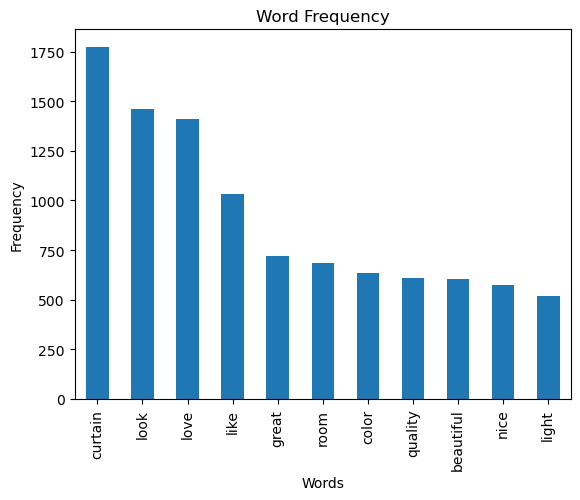

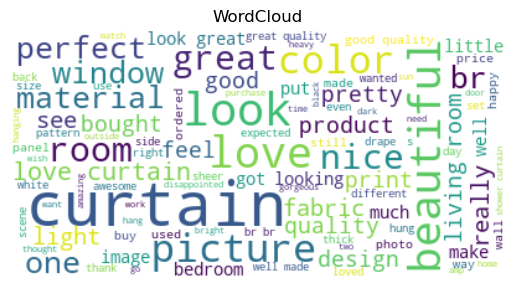

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         neg       0.98      0.31      0.47       180
         pos       0.88      1.00      0.94       943

    accuracy                           0.89      1123
   macro avg       0.93      0.65      0.70      1123
weighted avg       0.90      0.89      0.86      1123

Logistic Regression Average Accuracy: 0.84
Review: amazing curtains. pictured. beautiful design. balanced colors. go great bedroom! 
 Prediction: pos
Random Forest Average Accuracy: 0.88


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from warnings import filterwarnings

# Uyarıları gizleme ve pandas ayarları
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

# Metin işleme için lemmatizer
lemmatizer = WordNetLemmatizer()

# Veri Yükleme
df = pd.read_excel("C:/Users/ASUS/Desktop/amazon.xlsx")

# Metin ön işleme
def preprocess_text(text):
    if isinstance(text, str):  # Sadece metin (str) verileri işle
        # Küçük harfe çevirme
        text = text.lower()
        # Noktalama işaretlerini çıkarma
        text = text.replace('[^\w\s]', '')
        # Sayısal ifadeleri çıkarma
        text = text.replace('\d', '')
        # Stopwords'leri çıkarma
        stop_words = set(stopwords.words('english'))
        text = ' '.join(word for word in text.split() if word not in stop_words)
        # Lemmatizasyon
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# NaN değerlerini boş stringlerle doldur
df['Review'] = df['Review'].fillna('')

# Metinleri işleme
df['Review'] = df['Review'].apply(preprocess_text)

# Metin Görselleştirme
# Barplot
def plot_word_frequency(df):
    tf = df['Review'].str.split(expand=True).stack().value_counts()
    tf_df = tf.reset_index()
    tf_df.columns = ['words', 'tf']
    tf_df = tf_df[tf_df['tf'] > 500]
    tf_df.plot(kind='bar', x='words', y='tf', legend=False)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency')
    plt.show()

plot_word_frequency(df)

# Wordcloud
def plot_wordcloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud')
    plt.show()

text = ' '.join(df['Review'])  # Artık tüm veriler metin olduğu için bu çalışmalı
plot_wordcloud(text)

# Duygu Analizi
sia = SentimentIntensityAnalyzer()
df['Sentiment_Label'] = df['Review'].apply(lambda x: 'pos' if sia.polarity_scores(x)['compound'] > 0 else 'neg')

# Modelleme için veriyi ayırma
X = df['Review']
y = df['Sentiment_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vektörleştirme
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Lojistik Regresyon Modeli
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
y_pred = log_model.predict(X_test_tfidf)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

log_accuracy = cross_val_score(log_model, X_test_tfidf, y_test, cv=5).mean()
print(f"Logistic Regression Average Accuracy: {log_accuracy:.2f}")

# Örnekleme ve Tahmin
random_review = X.sample(1).values
sample_vectorized = tfidf_vectorizer.transform(random_review)
sample_prediction = log_model.predict(sample_vectorized)
print(f'Review: {random_review[0]} \n Prediction: {sample_prediction[0]}')

# Random Forest Modeli
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
rf_accuracy = cross_val_score(rf_model, X_test_tfidf, y_test, cv=5).mean()
print(f"Random Forest Average Accuracy: {rf_accuracy:.2f}")
